# YouTube 분석 시각화

## 파일 다운로드

In [9]:
!git clone https://github.com/Soyoung-Yoon/data_01

'git'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 한글 폰트 사용 구성

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False 
# plt.rc('font', family='NanumGothic')
plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic') 

# sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='whitegrid')
# sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

## YouTube 인기채널은?

- title	: 채널명
- category : 카테고리
- subscriber : 구독자수
- view : 조회수
- video : 영상개수

### 파일 읽어오기

- 엑셀 파일 : `pd.read_excel('파일이름', engine='openpyxl')`
- csv 파일 : `pd.read_csv('파일이름')` 

In [2]:
# [1-1] youtube_rank.xlsx 파일을 DataFrame 으로 읽어 df라는 이름을 붙입니다
df = pd.read_excel('./data_01/youtube_rank.xlsx', engine='openpyxl')
# 원본을 복사하여 둡니다
original = df.copy()

In [3]:
# [1-1] youtube_rank.csv 파일을 DataFrame으로 읽어 temp라는 이름을 붙입니다
temp = pd.read_csv('./data_01/youtube_rank.csv')

### 데이터 구조 확인

- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함
- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환

In [4]:
# [1-2] 읽어온 df 의 내용 중 첫 5개 행을 출력해 내용을 확인합니다
df.head(5)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


In [5]:
# [1-3] df의 row의 개수 및 각 column의 정보 및 메모리 사용량을 확인합니다.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 455.4 KB


In [6]:
# [1-4] df의 행, 열의 수를 확인합니다. (shape 사용)
print(df.shape)

(1000, 5)


DataFrame의 구성요소
- DataFrame.index : 행 index
- DataFrame.columns : 열 index
- DataFrame.values : 2차원 데이터

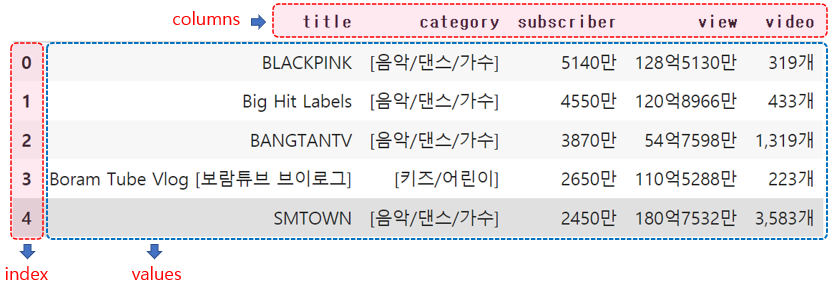

In [7]:
# [1-5] df의 index 구성요소 확인
df.index

RangeIndex(start=0, stop=1000, step=1)

In [8]:
# [1-6] df의 columns 구성요소 확인
df.columns

Index(['title', 'category', 'subscriber', 'view', 'video'], dtype='object')

In [9]:
# [1-7] df의 values 구성요소 확인
# ndarray - numpy의 배열, df.values => 2차원
df.values

array([['BLACKPINK', '[음악/댄스/가수]', '5140만', '128억5130만', '319개'],
       ['Big Hit Labels', '[음악/댄스/가수]', '4550만', '120억8966만', '433개'],
       ['BANGTANTV', '[음악/댄스/가수]', '3870만', '54억7598만', '1,319개'],
       ...,
       ['OCN', '[TV/방송]', '40만', '3억4583만', '10,071개'],
       ['Bravo jamoasi', '[미분류]', '40만', '6193만', '25개'],
       ['덕출 : DCTVGO', '[TV/방송]', '40만', '8249만', '202개']], dtype=object)

DataFrame의 한 개의 column은 Series이다.
- DataFrame[컬럼명] : Series
- DataFrame[[컬럼명1, 컬럼명2, ...]] : DataFrame

In [10]:
# [1-8] 데이터프레임의 'video' 컬럼의 내용 중 첫 5개 행을 출력합니다.
# dtype : 'object' -> 문자열
df['video'].head(5)

0      319개
1      433개
2    1,319개
3      223개
4    3,583개
Name: video, dtype: object

Series의 구성요소
- Series.index : Series의 행 index
- Series.values : 1차원 Series 데이터

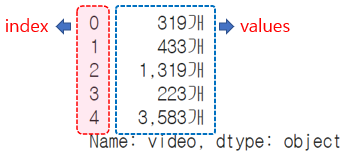

In [11]:
# [1-9] Series의 index 구성요소 확인
s = df['video']
print(type(s.index), s.index)

<class 'pandas.core.indexes.range.RangeIndex'> RangeIndex(start=0, stop=1000, step=1)


In [12]:
# [1-10] Series의 values 구성요소 확인
# 1차원 numpy array (ndarray)
print(type(s.values), s.shape)

<class 'numpy.ndarray'> (1000,)


DataFrame의 index, columns 및 Series의 index 는 대입연산을 사용하여 변경 가능합니다
- 다만, 개수가 동일해야 함

In [13]:
# [1-11] 컬럼의 이름을 ['채널', '카테고리', '구독자', '조회', '영상']으로 변경합니다.
# 변경 후 상위 2개 행을 출력해 봅니다.
df.columns = ['채널', '카테고리','구독자','조회','영상']
df.head(2)

,채널,카테고리,구독자,조회,영상
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개


In [14]:
# indexing을 사용하여 value를 변경한다.
df['채널'] = temp['title']

### 데이터 타입 변경

In [15]:
# [1-12] 원본(original)을 복사하여 df 이름을 부여합니다.
df = original.copy()

In [16]:
# [1-13] df의 내용 중 첫 5개 행을 출력합니다.
df.head(5)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


데이터의 dtype을 확인하는 방법
- DataFrame.info() : dtype 뿐 아니라 Non Null, Memory의 정보까지 표시됨
- DataFrame.dtypes : 각 columns 별 dtype 확인
- Series.dtype : Series의 dtype 확인

In [17]:
# [1-14] df의 각 column 별 dtype을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [18]:
# [1-15] df의 'subscriber' 컬럼의 데이터타입(dtype)을 확인해 봅니다.
df.dtypes

title         object
category      object
subscriber    object
view          object
video         object
dtype: object

In [19]:
# [1-16] df의 'subscriber'의 첫 3개 행을 출력해 내용을 확인합니다.
df['subscriber'].head(3)

0    5140만
1    4550만
2    3870만
Name: subscriber, dtype: object

데이터 타입을 변경하는 방법
- Series.astype(타입)
- 타입 표시 방법 : 'int', 'int32', 'int64', 'float', 'str', 'category',  ... 등의 문자열로 지정, np.int16, np.float32, np.datetime64, ... 등의 numpy 타입으로 지정
- numpy 타입으로 지정하기 위해서는  ```import numpy as np```  를 먼저 실행하여야 함

In [20]:
# [1-17] df의 'subscriber'컬럼의 dtype을 'int64' 으로 변경하여 보자
# 오류 발생함 - 한글, 특수문자 등이 섞여 있으면 정수로 변경할 수 없음
df['subscriber'].astype('int64')

ValueError: invalid literal for int() with base 10: '5140만'

데이터 값 변경 방법
- Series.replace(변경대상, 변경내용)
- Series.replace([변경대상1, 변경대상2, ...], [변경내용1, 변경내용2, ...])
- Series.replace({변경대상1:변경내용1, 변경대상2:변경내용2, ...})
- DataFrame도 replace 메서드 있음
- replace는 기본적으로 값 전체를 변경대상으로 지정함
- regex=True 를 사용하면 변경대상을 일부 내용만 대상으로 지정 할 수 있음
- regex => regular expression(정규식, 정규표현식)

In [21]:
# [1-18] df의 'subscriber' 컬럼에 대해 '만'을 '0000'으로 변경하는 코드를 작성합니다.
# replace는 기본적으로 값 전체를 대상으로 동작합니다.
# 일부 내용을 대상으로 하기 위해서는 regex=True 를 사용합니다.
# regex(=regular expression) - 문자열의 일부, 문자열 패턴을 사용하는 방법
df['subscriber'] = df['subscriber'].replace(r'만', '0000', regex=True)

In [22]:
# [1-19] df의 'subscriber' 컬럼에 대해 '만'을 '0000'으로 변경한 뒤, astype('int64')를 사용하여 dtype을 변경합니다. 
df['subscriber'] = df['subscriber'].astype('int64')

In [23]:
# [1-20] df의 'view' 컬럼에 대해서 첫 5개 행을 조회 합니다.
df['view'].head(5)

0    128억5130만
1    120억8966만
2     54억7598만
3    110억5288만
4    180억7532만
Name: view, dtype: object

In [24]:
# [1-21] df의 'view' 컬럼에 대해 '억'에 대해서는 삭제, '만'에 대해서는 '0000'로 변경하는 작업을 수행한 뒤, 처음 5개 데이터를 출력합니다.
# 변경할 내용이 여러  개 일 경우 두 개의 list 또는 dict 를 사용합니다.
df['view'].replace({r'억':'', r'만':'0000'}, regex=True).head(5)

0    12851300000
1    12089660000
2     5475980000
3    11052880000
4    18075320000
Name: view, dtype: object

In [25]:
# [1-22] df의 'view' 컬럼에 대해 '억'에 대해서는 삭제, '만'에 대해서는 '0000'로 변경하는 작업을 수행한 뒤, 
# astype('int64')를 사용하여 데이터 타입을 정수로 변경하고 처음 5개 데이터를 출력합니다.
df['view'] = df['view'].replace({r'억':'', r'만':'0000'}, regex=True).astype('int64')
df.head(5)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],51400000,12851300000,319개
1,Big Hit Labels,[음악/댄스/가수],45500000,12089660000,433개
2,BANGTANTV,[음악/댄스/가수],38700000,5475980000,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],26500000,11052880000,223개
4,SMTOWN,[음악/댄스/가수],24500000,18075320000,"3,583개"


In [26]:
# [1-23] df의 'video' 컬럼의 첫 5개 데이터를 확인합니다.
df['video'].head(5)

0      319개
1      433개
2    1,319개
3      223개
4    3,583개
Name: video, dtype: object

In [27]:
# [1-24] df의 'video' 컬럼에서 '개'와 ','을 제거하는 작업을 수행한 뒤, 처음 5개 데이터를 출력합니다.
# 콤마(,)는 의미가 있는 문자이므로 \(역슬래쉬)를 함께 사용합니다.
# 메타문자 : , . + ? * ^ $ [  ]  ... 등 , 메타문자의 기능을 없애기 위해 '\,'  '\.'
df['video'].replace(r'(\,|개)', '', regex=True).head(5)

0     319
1     433
2    1319
3     223
4    3583
Name: video, dtype: object

In [28]:
# [1-25] df의 'video' 컬럼에서 '개', ','을 제거하고, astype('int32')를 사용하여 는 작업을 수행한 뒤, 처음 5개 데이터를 출력합니다.
df['video'] = df['video'].replace(r'(\,|개)', '', regex=True).astype('int32')
df.head(5)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],51400000,12851300000,319
1,Big Hit Labels,[음악/댄스/가수],45500000,12089660000,433
2,BANGTANTV,[음악/댄스/가수],38700000,5475980000,1319
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],26500000,11052880000,223
4,SMTOWN,[음악/댄스/가수],24500000,18075320000,3583


원래 데이터의 값 별 개수 확인
- Series.value_counts() : 값 별 개수를 Series로 반환
- 개수가 많은 것부터 내림차순 정렬되어 반환됨
- 값이 index, 개수가 value 로 사용 됨

index의 정렬
- DataFrame / Series.sort_index(ascending=True)

In [29]:
# [1-26] df의 열 중 'category' 컬럼에 대해 값 별 개수를 확인합니다.
df['category'].value_counts()

[음악/댄스/가수]     175
[TV/방송]        161
[게임]           101
[키즈/어린이]        95
[음식/요리/레시피]     88
[BJ/인물/연예인]     68
[패션/미용]         57
[뉴스/정치/사회]      56
[미분류]           40
[취미/라이프]        40
[영화/만화/애니]      33
[교육/강의]         23
[애완/반려동물]       20
[스포츠/운동]        12
[IT/기술/컴퓨터]      8
[해외]             6
[주식/경제/부동산]      5
[국내/해외/여행]       5
[회사/오피셜]         4
[자동차]            2
[취미]             1
Name: category, dtype: int64

In [30]:
# [1-27] df의 'category'에 대해 첫글자와 마지막 글자인 '[', ']'을 제거합니다.
# replace를 사용하여 제거할 수 있지만, Accessor 중 str을 사용하여 보도록 합니다.
#df['category'].replace({'\[':'', '\]':''}, regex=True).head()    # 첫글자, 마지막 글자가 아니라도 제거함
df['category'].str[1:-1].head(5)

0    음악/댄스/가수
1    음악/댄스/가수
2    음악/댄스/가수
3      키즈/어린이
4    음악/댄스/가수
Name: category, dtype: object

In [31]:
# [1-28] df의 'category'에 대해 '[', ']'을 제거하고, astype('category') 를 사용하여 category 타입으로 변경합니다.
df['category'] = df['category'].str[1:-1].astype('category')

In [32]:
# [1-29] 위의 replace 및 accessor-str을 사용한 작업을 요약해 보겠습니다.
df['subscriber'] = df['subscriber'].replace('만', '0000', regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'', '만':'0000'}, regex=True).astype('int64')
df['video'] = df['video'].replace(['개', '\,'], '', regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1000 non-null   object  
 1   category    1000 non-null   category
 2   subscriber  1000 non-null   int64   
 3   view        1000 non-null   int64   
 4   video       1000 non-null   int32   
dtypes: category(1), int32(1), int64(2), object(1)
memory usage: 29.1+ KB


In [33]:
# [1-30] 'youtube_v1.xlsx' 엑셀 파일로 저장하기
df.to_excel('./data_01/youtube_v1.xlsx', engine='xlsxwriter')

datetime, category 타입변경
- pd.to_datetime(Series, format='형식')
    - %Y: 4글자 년도, %y : 2글자 년도, %m : 2글자 월, %d : 2글자 일
    - 다양한 형식 문자들 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    - format의 지정이 필수는 아님
- pd.Categorical(Series, categories=['범주1', '범주2', ...], ordered=None)
    - ordered=True 사용시 순서 있는 범주형, 정렬시 정해진 순서가 사용됨
    - categories, ordered의 지정이 필수는 아님

In [34]:
temp = pd.DataFrame({'날짜_일반': ['2021/01/01', '2021/01/02', '2021/01/03', '2021/01/04', '2021/01/05'],
                     '날짜_시간': ['2021-01-01 1:12:10', '2021-01-02 1:13:45', '2021-01-03 2:50:10', '2021-01-04 3:12:30', '2021-01-05 5:40:20'],
                     '날짜_특수': ['21-01-01', '21-01-02', '21-01-03', '21-01-04', '21-01-05'],
                     '범주': ['금', '토', '일', '월', '화']})
temp

,날짜_일반,날짜_시간,날짜_특수,범주
0,2021/01/01,2021-01-01 1:12:10,21-01-01,금
1,2021/01/02,2021-01-02 1:13:45,21-01-02,토
2,2021/01/03,2021-01-03 2:50:10,21-01-03,일
3,2021/01/04,2021-01-04 3:12:30,21-01-04,월
4,2021/01/05,2021-01-05 5:40:20,21-01-05,화


In [35]:
import numpy as np
# Series.astype(np.datetime64) 을 사용하여 '날짜_일반'의 dtype을 변경해 보자
temp['날짜_일반'].astype(np.datetime64)

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: 날짜_일반, dtype: datetime64[ns]

In [36]:
# Series.astype(np.datetime64) 을 사용하여 '날짜_시간'의 dtype을 변경해 보자
temp['날짜_시간'].astype(np.datetime64)

0   2021-01-01 01:12:10
1   2021-01-02 01:13:45
2   2021-01-03 02:50:10
3   2021-01-04 03:12:30
4   2021-01-05 05:40:20
Name: 날짜_시간, dtype: datetime64[ns]

In [37]:
# Series.astype(np.datetime64)을 사용하여 '날짜_특수'의 dtype을 변경해 보자
temp['날짜_특수'].astype(np.datetime64)

0   2001-01-21
1   2002-01-21
2   2003-01-21
3   2004-01-21
4   2005-01-21
Name: 날짜_특수, dtype: datetime64[ns]

In [38]:
# pd.to_datetime(Series, format='형식')을 사용하여 '날짜_특수'의 dtype을 변경해 보자
pd.to_datetime(temp['날짜_특수'], format='%y-%m-%d')

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: 날짜_특수, dtype: datetime64[ns]

In [39]:
# Series.astype('category')를 사용하여 '범주'의 dtype을 변경해 보자
temp['범주'].astype('category')

0    금
1    토
2    일
3    월
4    화
Name: 범주, dtype: category
Categories (5, object): ['금', '월', '일', '토', '화']

In [40]:
# 위에서 만들어진 '범주'를 정렬해 보자 (Series.sort_values() 사용)
temp['범주'].astype('category').sort_values()

0    금
3    월
2    일
1    토
4    화
Name: 범주, dtype: category
Categories (5, object): ['금', '월', '일', '토', '화']

In [41]:
# pd.Categorical(Series, categories=카테고리목록, ordered=True)를 사용해 요일 순 범주를 만들어 보자
# 요일목록 => ['월', '화', '수', '목', '금', '토', '일']
pd.Categorical(temp['범주'], categories=['월','화','수','목','금','토','일'], ordered=True)

['금', '토', '일', '월', '화']
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']

In [42]:
# 위에서 만들어진 '범주'를 정렬해 보자 (Series.sort_values() 사용)
pd.Categorical(temp['범주'], categories=['월','화','수','목','금','토','일'], ordered=True).sort_values()

['월', '화', '금', '토', '일']
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']

### 인기 채널 확인하기

데이터 정렬하기
- DataFrame.sort_values(컬럼명, ascending=True)
- DataFrame.sort_values([컬럼명1, 컬럼명2, ...], ascending=[...])
- 오름차순이 기본이며, ascending=False를 사용하여 내림차순 지정
- 1차기준, 2차기준 등 여러 개 기준이 존재하는 경우
     - 1차기준 정렬 된 후, 1차기준이 같은 것 내부에서 2차기준으로 정렬됨
     - 정렬방법은 각 기준별로 부여하거나, 1개만 부여할 수 있음

In [43]:
import pandas as pd
df = pd.read_excel('data_01/youtube_rank.xlsx', engine='openpyxl')
df['subscriber'] = df['subscriber'].replace('만', '0000', regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'', '만':'0000'}, regex=True).astype('int64')
df['video'] = df['video'].replace(['개', '\,'], '', regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')
df.head(2)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1000 non-null   object  
 1   category    1000 non-null   category
 2   subscriber  1000 non-null   int64   
 3   view        1000 non-null   int64   
 4   video       1000 non-null   int32   
dtypes: category(1), int32(1), int64(2), object(1)
memory usage: 29.2+ KB


In [45]:
# [1-31] 'subscriber' 가 가장 많은 5개의 채널을 알아봅니다.
df.sort_values(by='subscriber', ascending=False).head(5)[['title', 'subscriber']]

,title,subscriber
0,BLACKPINK,51400000
1,Big Hit Labels,45500000
2,BANGTANTV,38700000
3,Boram Tube Vlog [보람튜브 브이로그],26500000
4,SMTOWN,24500000


In [46]:
# [1-32] 'view'가 가장 많은 5개 채널을 알아봅니다
df.sort_values(by='view', ascending=False).head(5)[['title', 'view']]

,title,view
4,SMTOWN,18075320000
6,1theK (원더케이),17860420000
8,ArianaGrandeVevo,14796920000
0,BLACKPINK,12851300000
1,Big Hit Labels,12089660000


In [47]:
# [1-33] 'video'가 가장 많은 5개 채널을 알아봅니다
df.sort_values(by='video', ascending=False).head(5)[['title', 'video']]

,title,video
169,YTN news,492791
60,SBS Drama,339029
737,연합뉴스TV,311370
57,SBS Entertainment,210810
17,CNN,149530


In [48]:
# [1-34] 'video'가 가장 적은 5개 채널을 알아봅니다
df.sort_values(by='video').head(5)[['title', 'video']]

,title,video
194,OfficialGDRAGON,0
128,tzuyang쯔양,1
964,fx,3
454,CL,5
742,Trouble Maker (Official YouTube Channel),9


In [49]:
# [1-35] 'category'로 오름차순, 'subscriber'로 내림차순 정렬해 봅니다.
df.sort_values(by=['category', 'subscriber'], ascending=[True, False])

,title,category,subscriber,view,video
52,[Awesome Haeun]어썸하은,BJ/인물/연예인,4840000,703070000,419
75,영국남자 Korean Englishman,BJ/인물/연예인,3940000,1160110000,411
79,워크맨-Workman,BJ/인물/연예인,3810000,469330000,76
82,waveya 2011,BJ/인물/연예인,3720000,1299280000,647
84,허팝Heopop,BJ/인물/연예인,3710000,2748310000,1685
...,...,...,...,...,...
671,AshleyMariee,해외,590000,55950000,2033
53,Samsung,회사/오피셜,4780000,585350000,1135
108,Billboard,회사/오피셜,2900000,1010800000,6100
709,미스&미스터트롯 공식계정,회사/오피셜,570000,202340000,659


Boolean indexing 사용하여 조건에 맞는 데이터 가져오기
- DataFrame.loc[조건, :]
- DataFrame[조건]
- 조건은 boolean dtype이어야 하며 행의 수와 같아야 함
- 복잡한 조건 작성
    - (조건1) | (조건2)  : 조건1 또는 조건2를 만족하는 데이터
    - (조건1) & (조건2)  : 조건1, 조건2 모두 만족하는 데이터
    - ~(조건) : 조건이 거짓인 데이터

In [50]:
temp = pd.DataFrame({'A': [1, 2, 3, 4],
                     'B': [6, 5, 4, 3],
                     'C': [3, 4, 5, 2]})
temp

,A,B,C
0,1,6,3
1,2,5,4
2,3,4,5
3,4,3,2


In [51]:
# [1-36] 'category'가 '음악/댄스/가수'인 채널의 subscriber TOP5를 알아봅니다.
# df.query('category == "음악/댄스/가수"')
df[(df['category']=='음악/댄스/가수')].sort_values(by='subscriber', ascending=False).head(5)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
5,1MILLION Dance Studio,음악/댄스/가수,22300000,5753580000,2205


In [52]:
# [1-37] 'category'가 'TV/방송'인 채널의 view TOP5를 알아봅니다.
df[(df['category']=='TV/방송')].sort_values(by='view', ascending=False).head(5)

,title,category,subscriber,view,video
12,KBS World,TV/방송,14300000,10158060000,46830
22,MBCkpop,TV/방송,8670000,6339380000,38695
76,KBS Entertain,TV/방송,3930000,5340910000,91783
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
77,MBCdrama,TV/방송,3920000,4350540000,51543


In [53]:
# [1-38] 'subscriber'가 30000000 (3천만) 이상인 채널을 알아봅니다.
df[(df['subscriber']>=30000000)]

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319


In [54]:
# [1-39] 'video' 개수가 30000 이상 35000 이하인 채널을 알아봅니다.
df[(df['video']>=30000) & (df['video']<=35000)]

,title,category,subscriber,view,video
409,TBS 시민의방송,뉴스/정치/사회,930000,582330000,30431


In [55]:
# [1-40] 'subscriber'가 30000000 (3천만)이상 이거나, 
#        'video' 개수가 50000 이상인 채널을 알아봅니다.
df[(df['subscriber']>=30000000) | (df['video']>=50000)]

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
17,CNN,뉴스/정치/사회,10900000,7899750000,149530
27,MBCentertainment,뉴스/정치/사회,7710000,11683060000,79567
38,JTBC Entertainment,뉴스/정치/사회,6020000,7638370000,58938
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
60,SBS Drama,TV/방송,4360000,4260860000,339029
76,KBS Entertain,TV/방송,3930000,5340910000,91783
77,MBCdrama,TV/방송,3920000,4350540000,51543


Series의 value가 목록에 포함된 내용인지 확인
- Series.isin([내용1, 내용2, ...]) : Series에 포함된 내용이 목록에 있는 경우 True, 없으면 False인 Boolean Series 반환 (Boolean indexing에 사용)

In [56]:
# [1-41] 'category'의 값 별 개수를 확인합니다.
df['category'].value_counts()

음악/댄스/가수     175
TV/방송        161
게임           101
키즈/어린이        95
음식/요리/레시피     88
BJ/인물/연예인     68
패션/미용         57
뉴스/정치/사회      56
미분류           40
취미/라이프        40
영화/만화/애니      33
교육/강의         23
애완/반려동물       20
스포츠/운동        12
IT/기술/컴퓨터      8
해외             6
주식/경제/부동산      5
국내/해외/여행       5
회사/오피셜         4
자동차            2
취미             1
Name: category, dtype: int64

In [57]:
# [1-42] 'category'가 'TV/방송' 이거나 '게임'인 채널의 개수를 확인합니다.  (262개)
df['category'].isin(['TV/방송', '게임']).value_counts()
# len(df[df['category'].isin(['TV/방송', '게임'])])

False    738
True     262
Name: category, dtype: int64

In [58]:
# [1-43] 'category'가 '음악/댄스/가수'인 채널의 subscriber TOP5를 알아봅니다. (isin 활용)
df[df['category'].isin(['음악/댄스/가수'])].sort_values(by='subscriber', ascending=False).head(5)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
5,1MILLION Dance Studio,음악/댄스/가수,22300000,5753580000,2205


- Series의 str Accessor 사용
    + str.contains('문자열') : 특정 문자열을 포함하는지 아닌지를 True/False로 반환 (Boolean Indexing 조건으로 사용 가능)
    + str.upper() : 영문자 소문자를 대문자로 변경
    + str.lower() : 영문자 대문자를 소문자로 변경
    + 세부 내용 : https://pandas.pydata.org/docs/reference/series.html#string-handling
- Series의 데이터를 list 및 ndarray로 반환
    + Series.to_list() : Series의 values를 list로 반환
    + Series.to_numpy() : Series의 values를 ndarray로 반환 (Series.values 와 동일)

In [59]:
# [1-44] title에 'KBS'가 포함된 채널 명 목록을 만들어 봅니다.
df[df['title'].str.contains('KBS')]['title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

In [60]:
# 대소문자 구분 없이 검색 하려면?
df[df['title'].str.contains(r'[kK][bB][sS]', regex=True)]['title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

### 통계값 알아보기

- DataFrame.describe() : 숫자형 데이터타입을 갖는 컬럼에 대해 count, mean, std, min, max, Q1, Q2, Q3 등의 통계값 구하기
- Series.count() : 개수
- Series.sum() : 합계
- Series.mean() : 평균
- Series.std() : 표준편차
- Series.var() : 분산
- Series.median() : 중앙값
- Series.mode() : 최빈값
- Series.quantile([0.5, 0.75]) : 분위수

In [61]:
import pandas as pd
df = pd.read_excel('data_01/youtube_rank.xlsx', engine='openpyxl')
df['subscriber'] = df['subscriber'].replace('만', '0000', regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'', '만':'0000'}, regex=True).astype('int64')
df['video'] = df['video'].replace(['개', '\,'], '', regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')
df.head(2)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433


In [62]:
# 소수점 아래 2째자리까지 표시되도록 설정하기
pd.options.display.float_format = '{:,.2f}'.format

In [63]:
# [1-45] subscriber, view, video에 대한 통계값을 알아봅니다. (describe 사용)
df.describe()

,subscriber,view,video
count,"1,000.00","1,000.00","1,000.00"
mean,"1,645,040.00","672,294,140.00","4,766.68"
std,"3,422,951.74","1,588,075,704.63","25,424.80"
min,"400,000.00",0.00,0.00
25%,"540,000.00","109,560,000.00",222.00
50%,"780,000.00","242,365,000.00",506.00
75%,"1,392,500.00","535,182,500.00","1,491.50"
max,"51,400,000.00","18,075,320,000.00","492,791.00"


In [64]:
# [1-46] 'video' 컬럼의 데이터 개수를 구합니다
df['video'].count()

1000

In [65]:
# [1-47] 'video' 컬럼의 합계를 구합니다.
df['video'].sum()

4766680

In [66]:
# [1-48] 'video' 컬럼의 평균, 중앙값을 구합니다.
print(df['video'].mean(), df['video'].median())

4766.68 506.0


In [67]:
# [1-49] 'video'의 분산과 표준편차를 구합니다.
print(df['video'].var(), df['video'].std())

646420552.9165165 25424.801924823652


In [68]:
# [1-50] 'subscriber'의 최대, 최소값을 구합니다.
print(df['subscriber'].min(), df['subscriber'].max())

400000 51400000


In [69]:
# [1-51] 'subscriber'의 최빈값을 구합니다. => Series
df['subscriber'].mode()

0    440000
Name: subscriber, dtype: int64

In [70]:
# [1-52] 'subscriber'의 Q1, Q2, Q3(25% 50%, 75%) 를 구합니다.
df['subscriber'].quantile([0.25, 0.50, 0.75])

0.25     540,000.00
0.50     780,000.00
0.75   1,392,500.00
Name: subscriber, dtype: float64

그룹별 통계치 구하기  
- DataFrame.groupby(그룹명).적용할통계함수()
    - DataFrame의 함수 적용 가능 컬럼들에 대해 그룹별 통계치를 구함 
    - 통계함수에는 sum, mean, std, var, min, max, count, quantile 등이 있음
- DataFrame.groupby(그룹명)[컬럼].적용할통계함수() : Series
- DataFrame.groupby(그룹명)[[컬럼1, 컬럼2, ...]].적용할통계함수() : DataFrame

In [71]:
# [1-53] category 별 평균을 구할 수 있는 모든 컬럼에 대한 평균을 구합니다.
df.groupby('category').mean()

,subscriber,view,video
category,,,
BJ/인물/연예인,"1,274,411.76","410,154,852.94",837.74
IT/기술/컴퓨터,"806,250.00","176,610,000.00","1,200.12"
TV/방송,"1,219,875.78","718,483,416.15","9,025.13"
게임,"743,564.36","454,253,465.35","2,527.01"
교육/강의,"851,304.35","177,218,260.87",837.91
국내/해외/여행,"626,000.00","186,624,000.00",830.20
뉴스/정치/사회,"1,226,964.29","1,199,935,535.71","42,048.09"
미분류,"1,429,500.00","409,034,000.00",778.05
스포츠/운동,"932,500.00","279,189,166.67","3,954.92"


In [72]:
# [1-54] category 별 view에 대한 평균을 구합니다.
df.groupby('category')['view'].mean()

category
BJ/인물/연예인     410,154,852.94
IT/기술/컴퓨터     176,610,000.00
TV/방송         718,483,416.15
게임            454,253,465.35
교육/강의         177,218,260.87
국내/해외/여행      186,624,000.00
뉴스/정치/사회    1,199,935,535.71
미분류           409,034,000.00
스포츠/운동        279,189,166.67
애완/반려동물       421,317,000.00
영화/만화/애니      318,586,969.70
음식/요리/레시피     407,381,931.82
음악/댄스/가수    1,091,668,457.14
자동차           185,615,000.00
주식/경제/부동산      68,000,000.00
취미            106,150,000.00
취미/라이프        204,311,750.00
키즈/어린이      1,281,384,315.79
패션/미용         104,377,368.42
해외            838,253,333.33
회사/오피셜        496,612,500.00
Name: view, dtype: float64

In [73]:
# [1-55] category 별 view, video에 대한 합계를 구합니다.
df.groupby('category')[['view', 'video']].sum()

,view,video
category,,
BJ/인물/연예인,27890530000,56966
IT/기술/컴퓨터,1412880000,9601
TV/방송,115675830000,1453046
게임,45879600000,255228
교육/강의,4076020000,19272
국내/해외/여행,933120000,4151
뉴스/정치/사회,67196390000,2354693
미분류,16361360000,31122
스포츠/운동,3350270000,47459


### 시각화

- 분포 시각화
- 범주형 : 바(bar) 그래프
- 연속형 : 히스토그램, 박스 플롯(boxplot)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import pandas as pd
df = pd.read_excel('data_01/youtube_rank.xlsx', engine='openpyxl')
df['subscriber'] = df['subscriber'].replace('만', '0000', regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'', '만':'0000'}, regex=True).astype('int64')
df['video'] = df['video'].replace(['개', '\,'], '', regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')
df.head(2)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1000 non-null   object  
 1   category    1000 non-null   category
 2   subscriber  1000 non-null   int64   
 3   view        1000 non-null   int64   
 4   video       1000 non-null   int32   
dtypes: category(1), int32(1), int64(2), object(1)
memory usage: 29.2+ KB


In [113]:
# [1-56] category 별 채널 개수를 오름차순으로 정렬하여 구합니다.
channel = df['category'].value_counts().sort_values(ascending=True).to_frame()
channel.head()

,category
취미,1
자동차,2
회사/오피셜,4
국내/해외/여행,5
주식/경제/부동산,5


In [112]:
type(channel)

pandas.core.frame.DataFrame

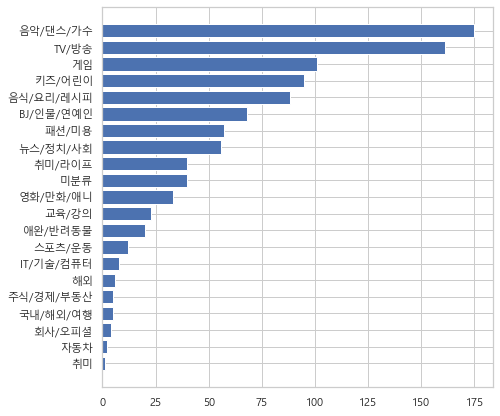

In [122]:
# [1-57] matplotlib의 pyplot을 사용하여 channel에 대한 bar 그래프를 그립니다
plt.figure(figsize=(7,7))

plt.barh(y=channel.index, width=channel['category'])
plt.grid(True)

plt.show()

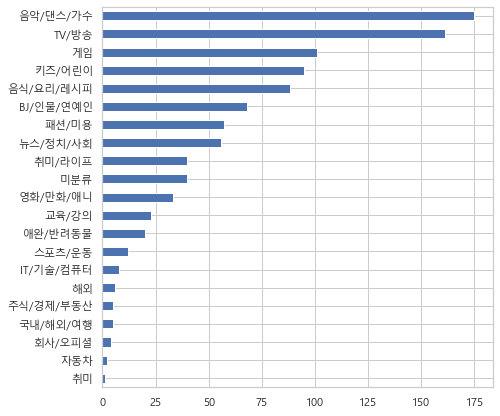

In [124]:
# [1-58] Series의 plot을 사용하여 channel에 대한 bar 그래프를 그립니다
channel.category.plot.barh(figsize=(7,7), grid=True)

plt.show()

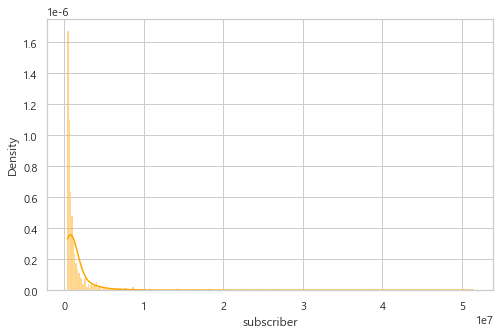

In [136]:
# [1-59] Seaborn의 histplot으로 'subscriber'의 분포를 히스토그램으로 그립니다
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='subscriber', color='orange', kde=True, stat='density', alpha=0.5)
plt.show()

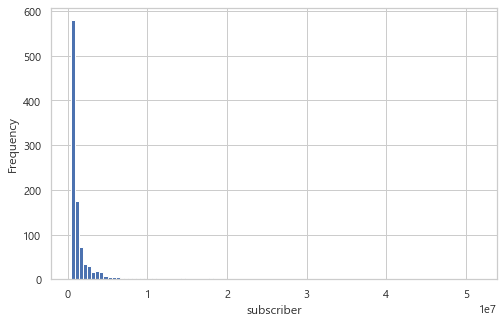

In [144]:
# [1-60] DataFrame의 plot으로 'subscriber'의 분포를 히스토그램으로 그립니다
df.plot(kind='hist', y='subscriber', bins=100, figsize=(8,5), legend=False, xlabel='subscriber')
plt.xlabel('subscriber')
plt.show()

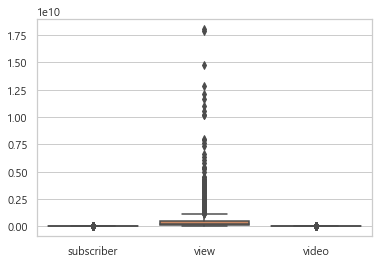

In [145]:
# [1-61] Seaborn의 boxplot으로 
# 'subscriber', 'view', 'video'의 분포를 박스 플롯으로 그립니다
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.show()

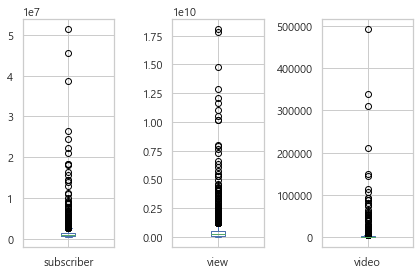

In [156]:
# [1-62] matplotlib의 pyplot으로
# 'subscriber', 'view', 'video'의 분포를 박스 플롯으로 그립니다
for idx, column in enumerate(['subscriber', 'view', 'video'], start=131):
    plt.subplot(idx)
    df[column].plot.box()

plt.tight_layout()
plt.show() 

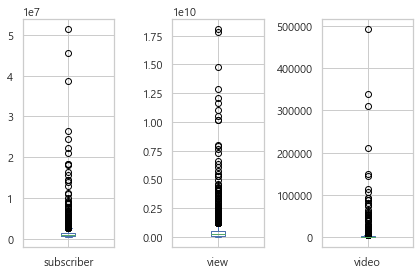

In [160]:
# [1-63] DataFrame의 plot으로
# 'subscriber', 'view', 'video'의 분포를 박스 플롯으로 그립니다
df.plot(kind='box', subplots=True)
plt.tight_layout()
plt.show()

In [126]:
# 고생하셨습니다!!